In [1]:
import pandas as pd
df_all = pd.read_csv('C:\\Users\\Brend\\Downloads\\correlation_top42.csv', index_col = 'name', encoding = "UTF-8")
print("Total: %d authors" % df_all.shape[0])

Total: 1965872 authors


In [2]:
df_trimmed = df_all[df_all['num_pubs'] >= 50]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 368618 authors


In [3]:
linear_metrics = ['pct_collab_linauth', 'pct_collab_linprof', 
                  'pct_collab_sqrtauth', 'pct_collab_sqrtprof', 
                  'pct_collab_unweighted', 'InterClusterRatio', 
                  'IntraClusterRatio']
log_metrics = ['IntraCommunityFocus', 'InterCommunityFocus']
all_metrics = linear_metrics + log_metrics
impact = ['avg_PR', 'max_PR', 'avg_AR', 'max_AR']


In [18]:
for col in all_metrics:
    print("\nTop 10 %s" % str(col))
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    df_not_one = df_not_null[df_not_null[col] != 1]
    print(df_not_one[[col]].sort_values(col, ascending = False).head(10))


Top 10 pct_collab_linauth
                     pct_collab_linauth
name                                   
Greta Beighton                 0.961331
Wolfgang J. Kox                0.828048
Craig Carthel                  0.821645
Horst Kunkely                  0.818672
Andrew Yee                     0.817676
S. E. Wolkenberg               0.815714
S. K. Young                    0.795239
Claudia Stöllberger            0.792776
L. J. Andrews                  0.790444
Linda Elder                    0.787025

Top 10 pct_collab_linprof
                 pct_collab_linprof
name                               
Reinhard Voll              0.994545
Dieter Fritze              0.980906
Greta Beighton             0.964513
Hartmut Stocker            0.955197
Eric Ekland                0.949941
Michael Petzsch            0.943716
Carol Mulrooney            0.936164
Jan Kähler                 0.932622
Wolfgang Rösch             0.930754
Axel Matzdorff             0.927353

Top 10 pct_collab_sqrtauth
      

In [19]:
for col in all_metrics:
    print("\nBottom 10 %s" % str(col))
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    df_not_zero = df_not_null[df_not_null[col] != 0]
    print(df_not_zero[[col]].sort_values(col, ascending = True).head(10))


Bottom 10 pct_collab_linauth
                   pct_collab_linauth
name                                 
C. C. Levine                 0.000011
Syrkin Al                    0.000019
Ibrahim W. Habib             0.000020
Satar Rezaei                 0.000025
Meunier Françoise            0.000026
Marina Weber                 0.000028
Rabin Banerjee               0.000031
Ap Aboyeji                   0.000036
Pascal Foumane               0.000039
Roberta Kwok                 0.000044

Bottom 10 pct_collab_linprof
                    pct_collab_linprof
name                                  
C. C. Levine                  0.000023
Syrkin Al                     0.000049
Meunier Françoise             0.000061
Wallace R. Gardner            0.000068
Ibrahim W. Habib              0.000085
Satar Rezaei                  0.000086
Rabin Banerjee                0.000088
Lucian Prodan                 0.000088
Roberta Kwok                  0.000127
Marina Weber                  0.000137

Bottom 10 pct_c

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

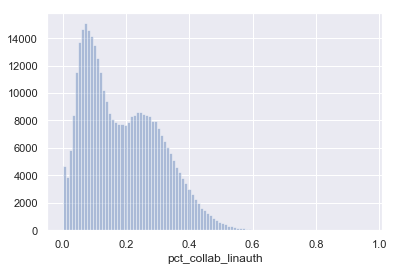

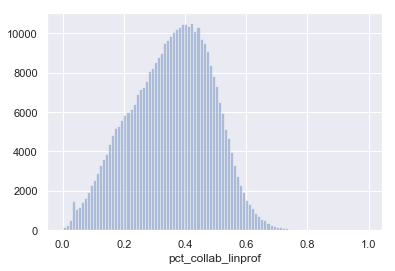

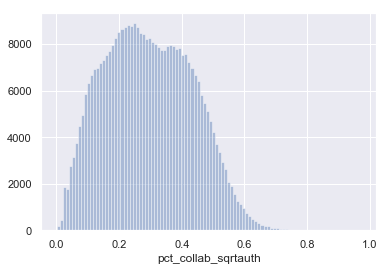

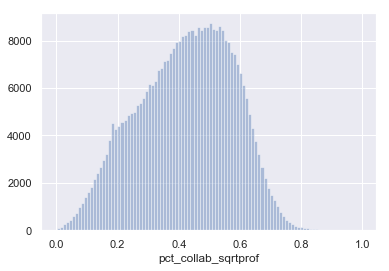

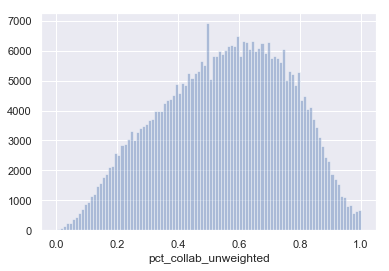

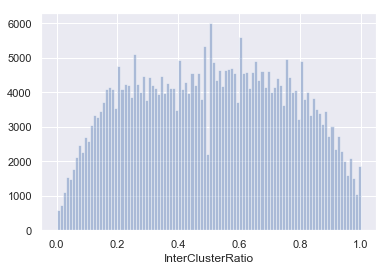

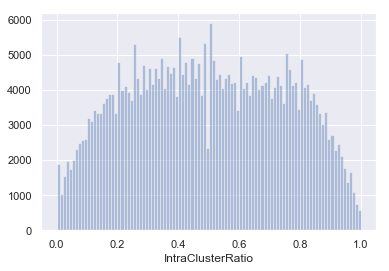

In [5]:
for col in linear_metrics:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    plt.show()

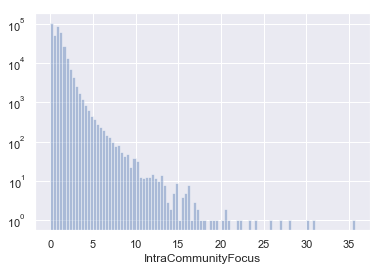

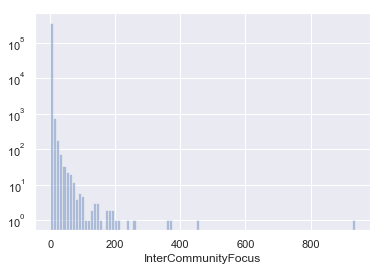

In [6]:
for col in log_metrics:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

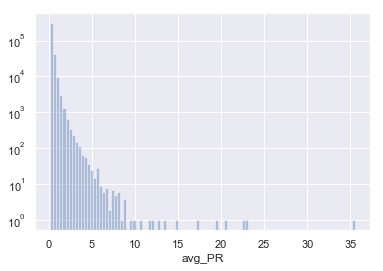

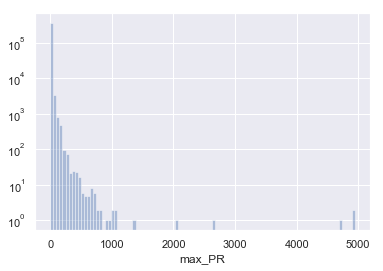

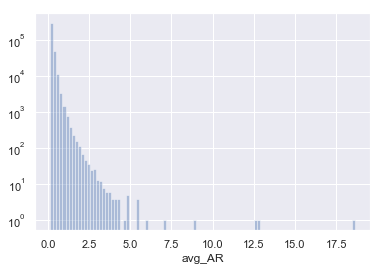

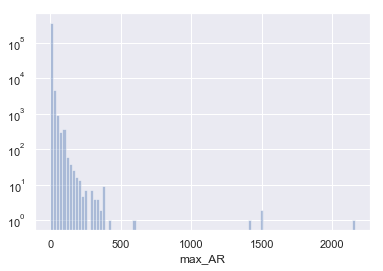

In [7]:
for col in impact:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

In [28]:
df_log = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log[[col]]
    df_log[col + '_log'] = log_col.apply(np.log, axis=0)
df_log = df_log[[col for col in df_log.columns if 'log' in col]]

In [29]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[[col]]
    df_scaled[col + '_zscore'] = ss.fit_transform(scaled_col)
df_zscores = df_scaled[[col for col in df_scaled.columns if 'zscore' in col]]

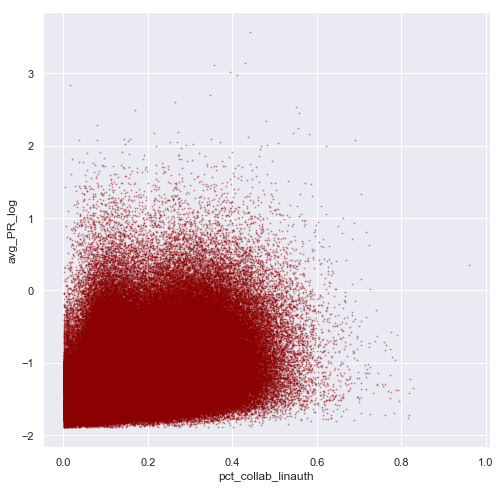

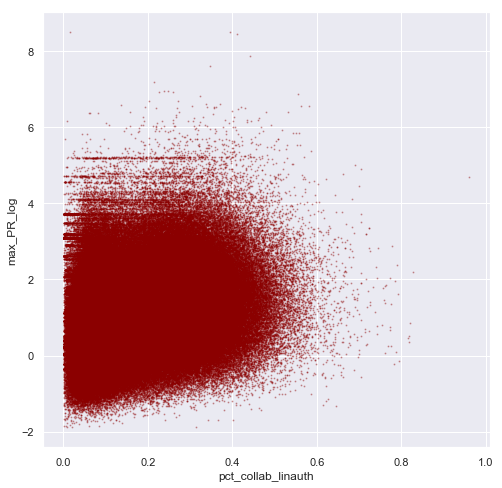

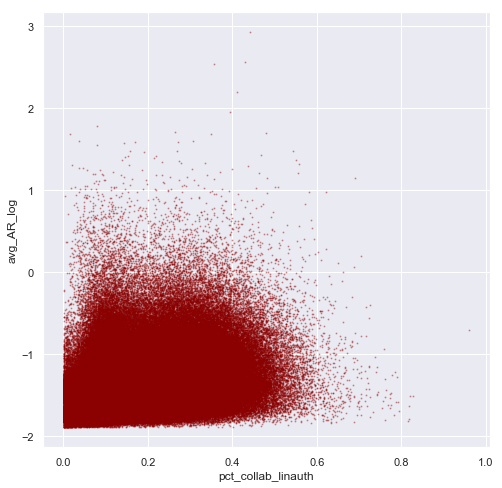

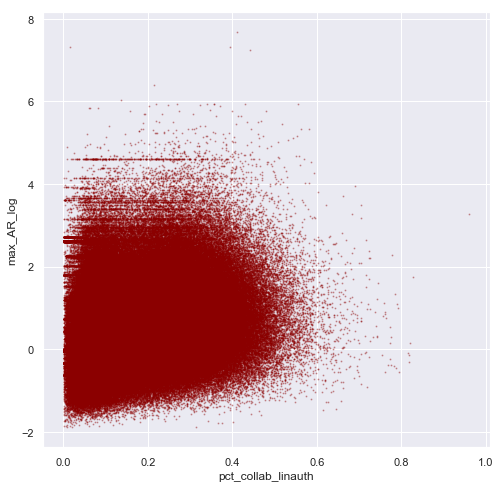

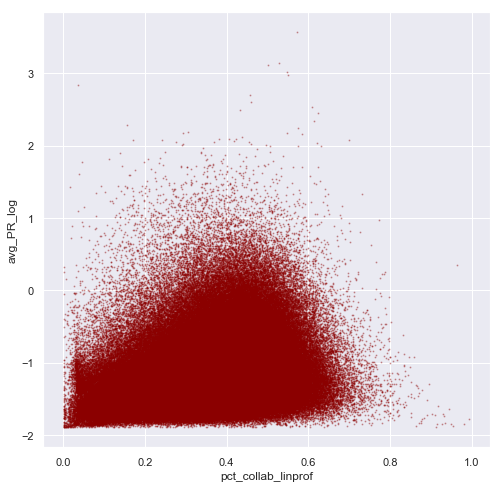

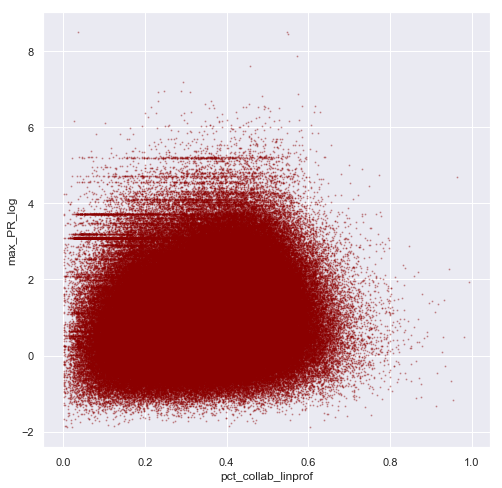

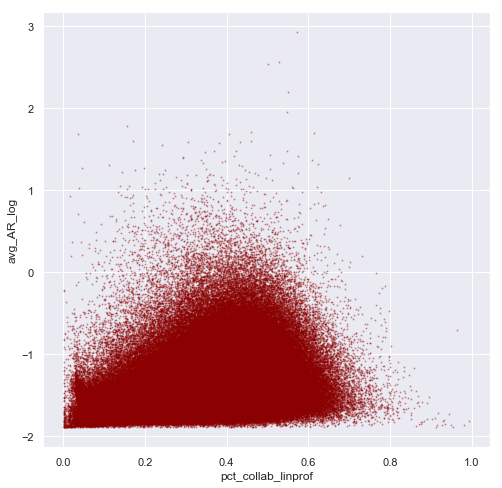

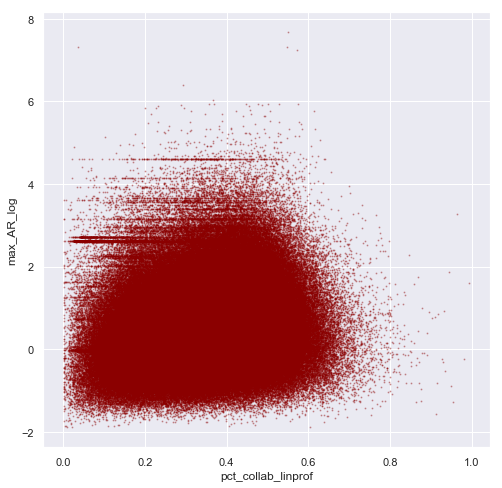

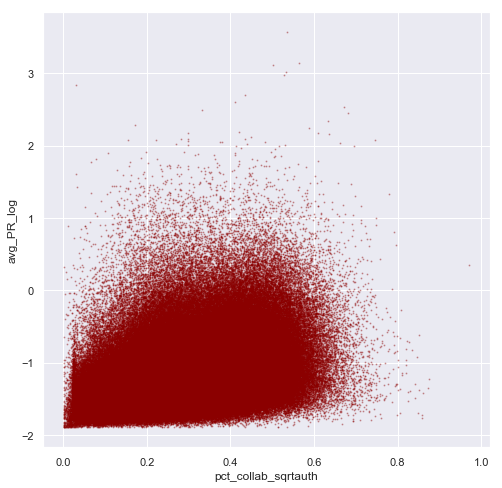

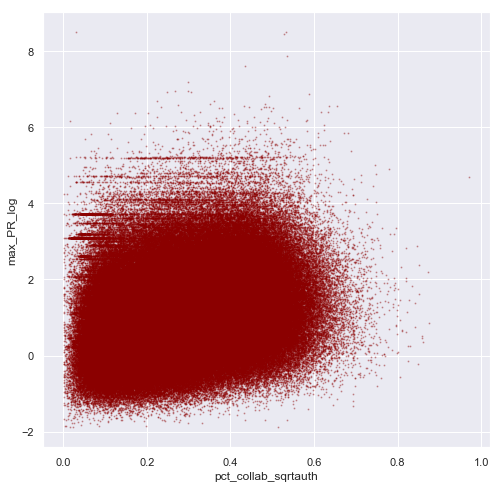

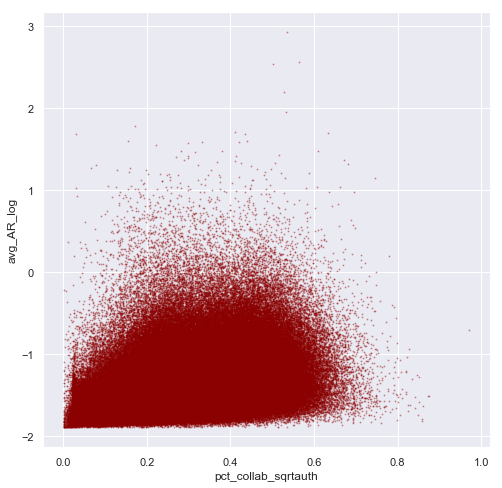

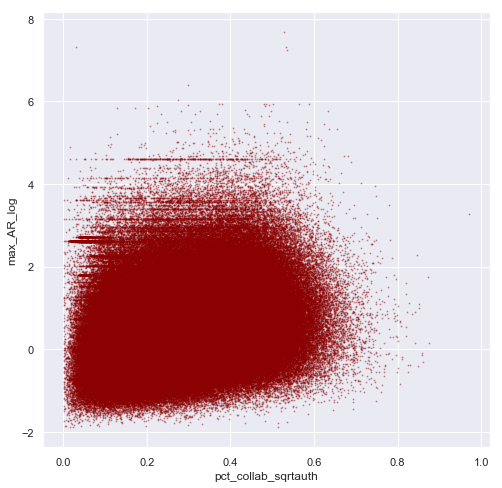

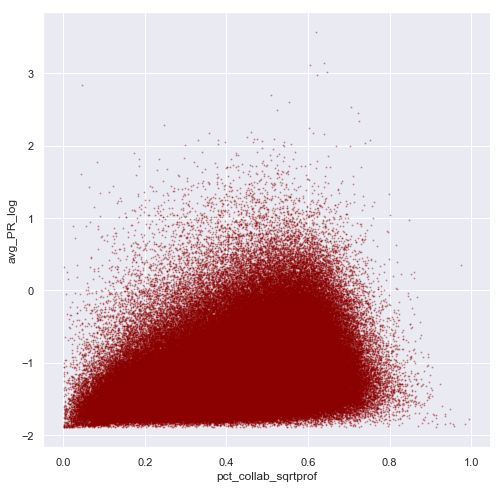

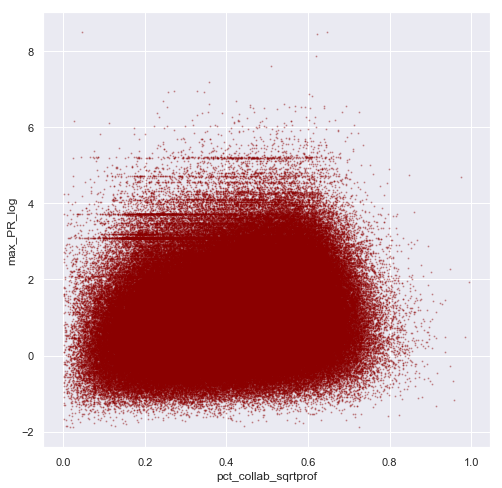

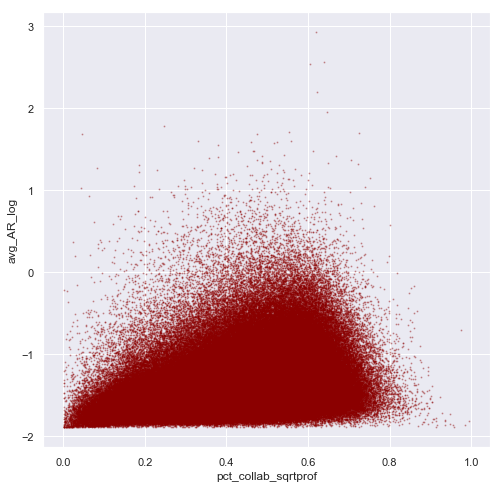

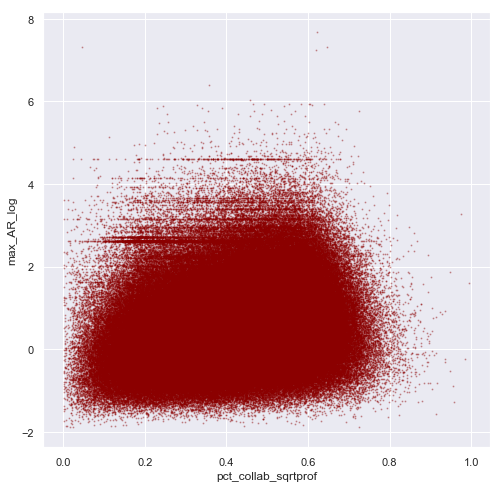

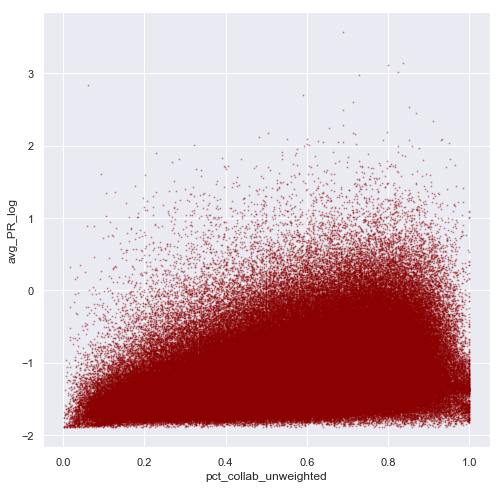

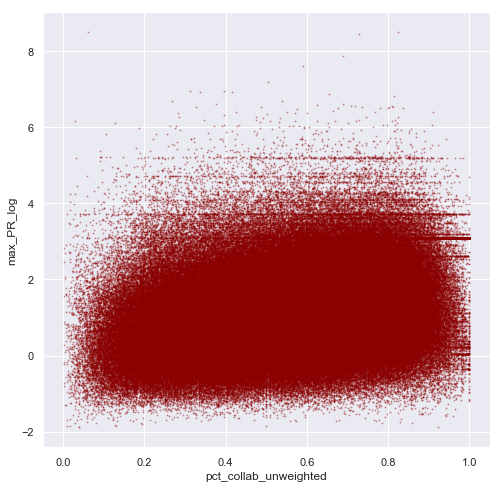

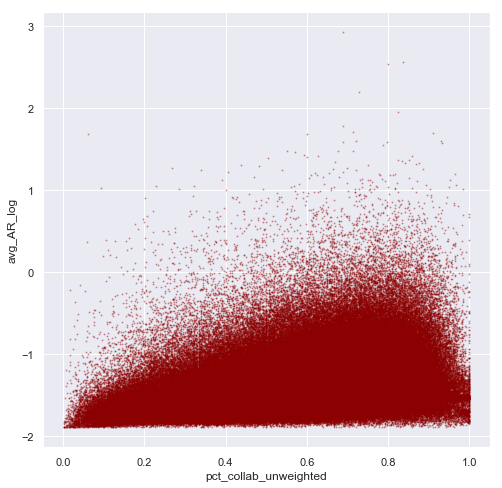

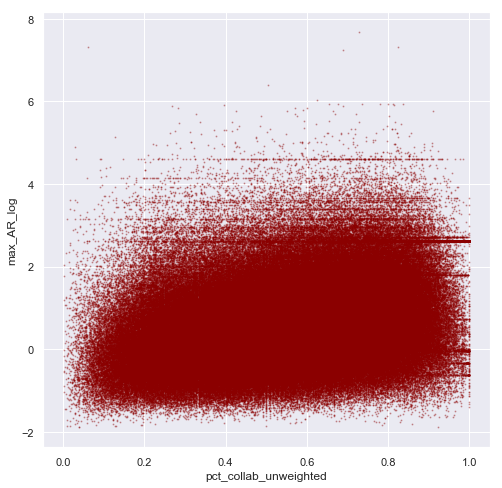

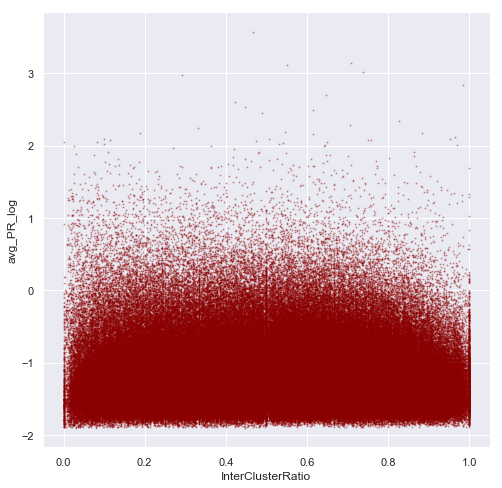

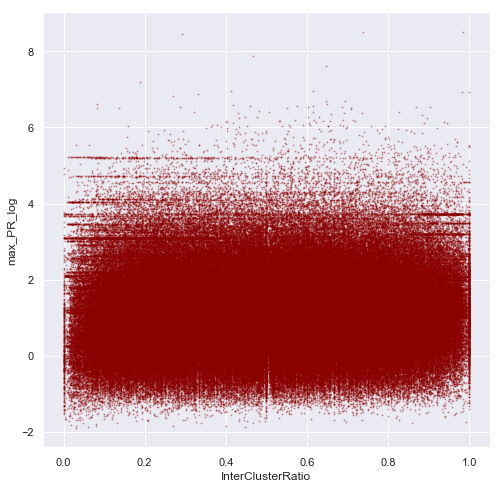

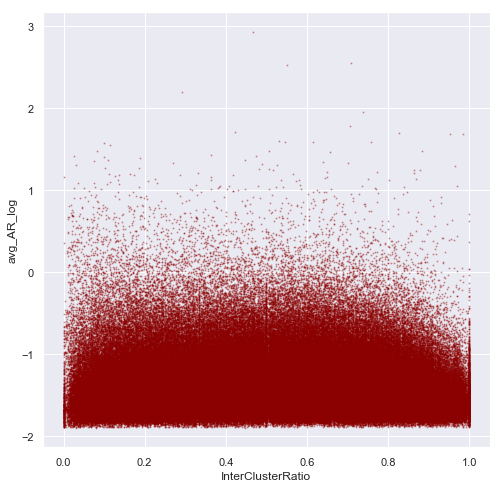

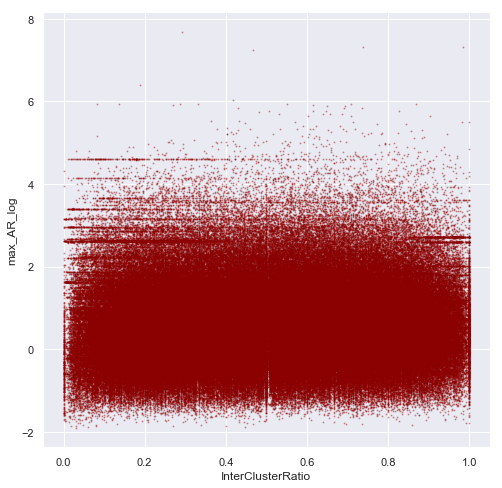

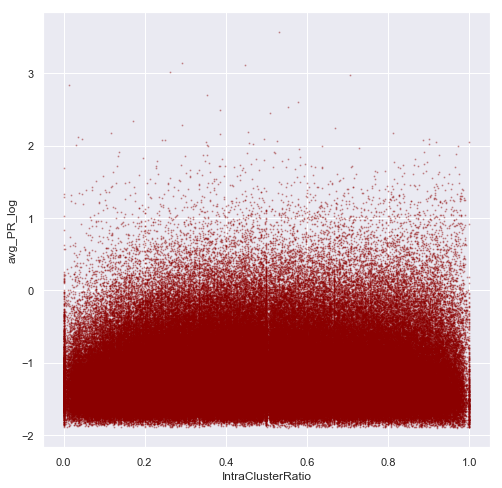

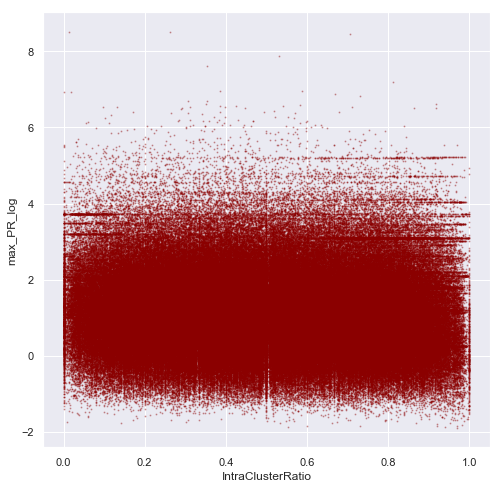

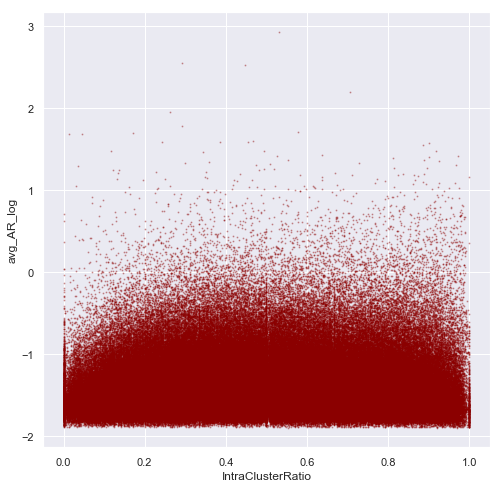

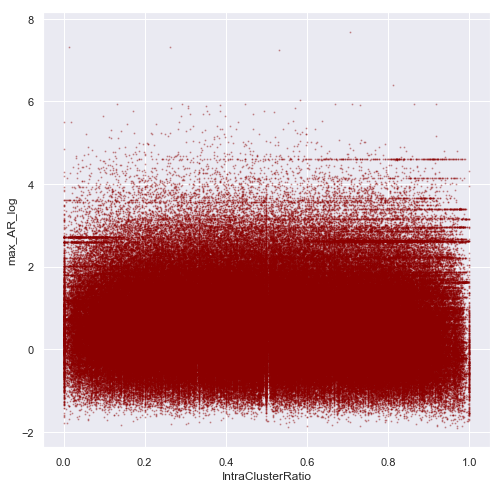

In [9]:
for x_col in linear_metrics:
    for y_col in impact:
        data = pd.concat([df_trimmed[[x_col]], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col, y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


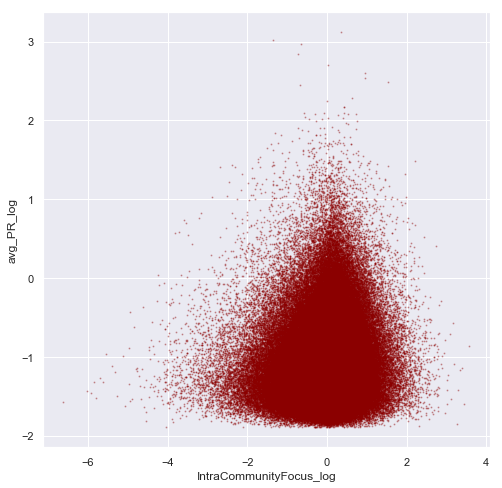

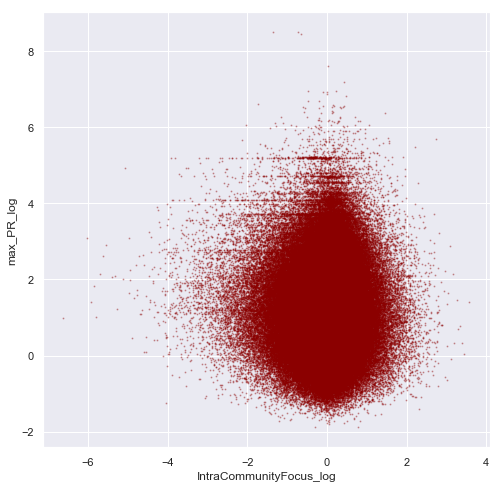

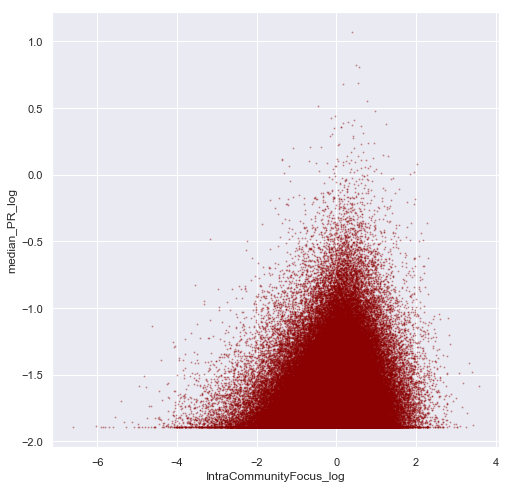

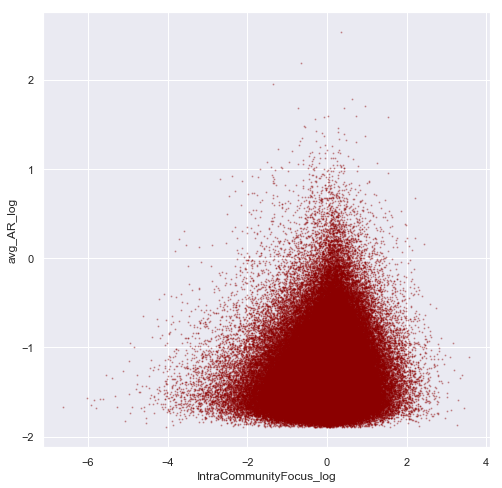

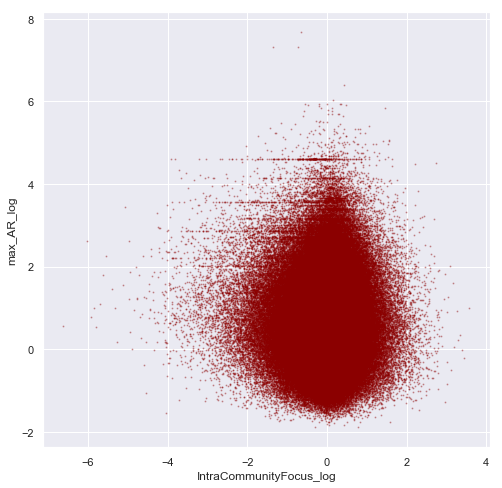

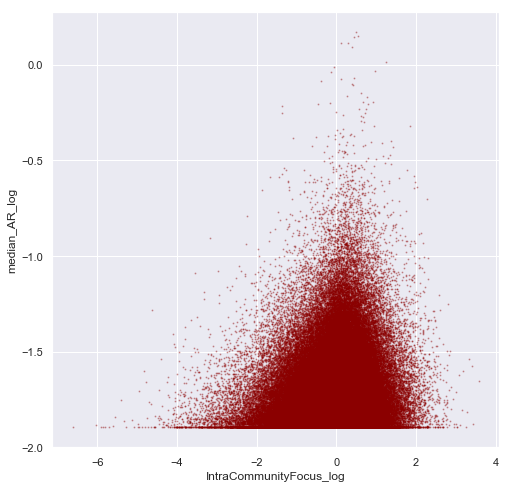

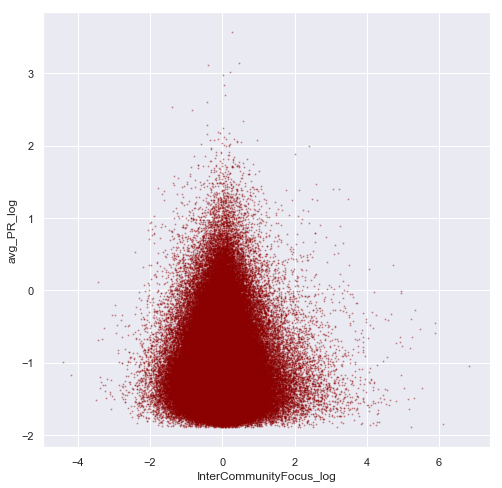

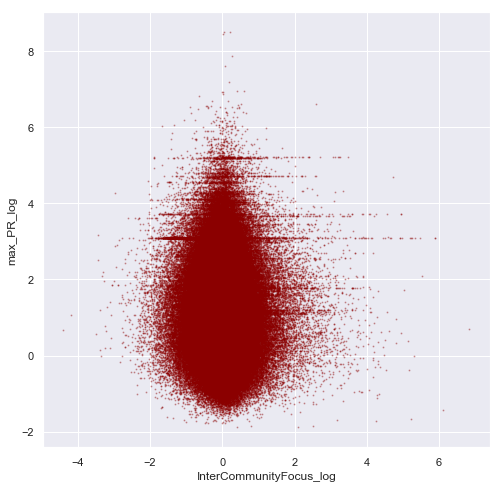

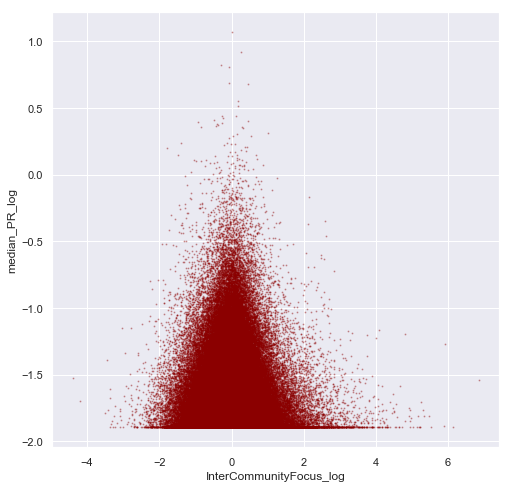

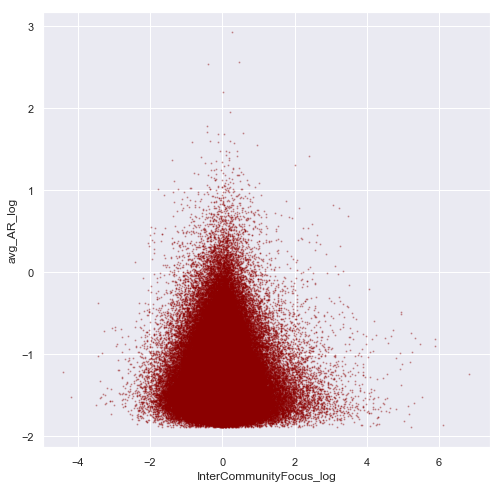

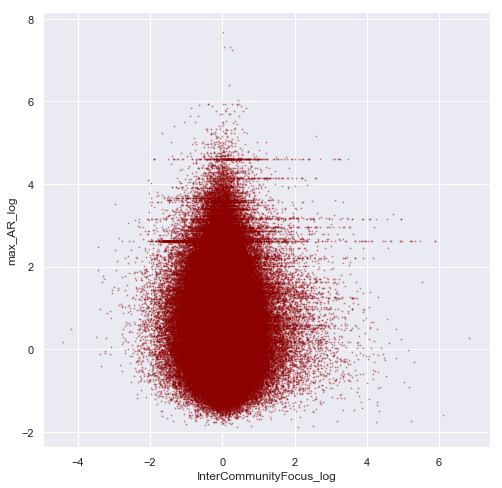

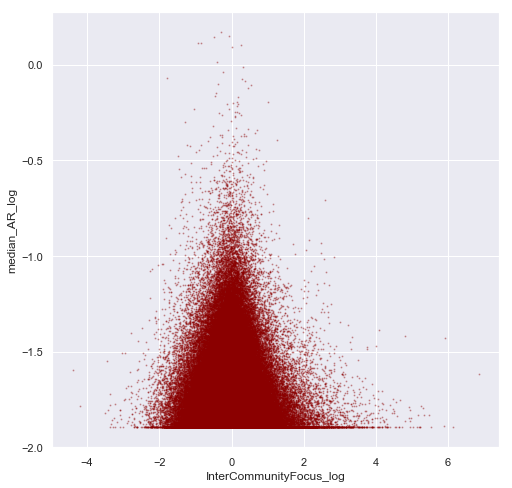

In [31]:
for x_col in log_metrics:
    for y_col in impact:
        data = pd.concat([df_log[[x_col+'_log']], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col+'_log', y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


In [34]:
df_log_adjusted = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log_adjusted[[col]]
    df_log_adjusted[col + '_log'] = log_col.apply(lambda x: np.log(x+1), axis=0)
df_log_adjusted = df_log_adjusted[[col for col in df_log_adjusted.columns if 'log' in col]]